In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/Titanic-Dataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**EDA**

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: title={'center': 'Missing values in percentage'}, ylabel='percentage'>

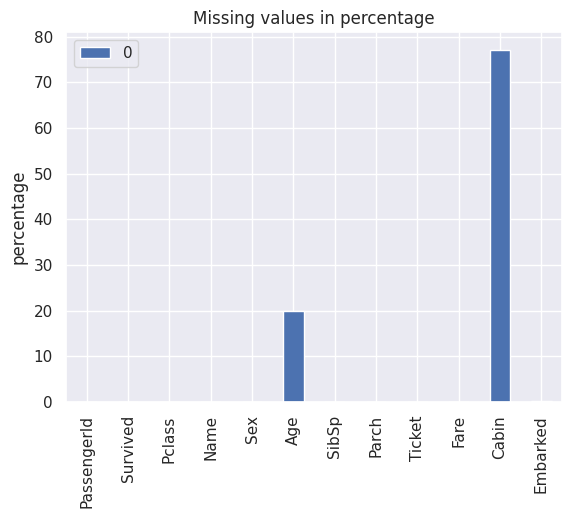

In [6]:
#just tp visualize missing values
import seaborn as sns
sns.set()
miss_vals = pd.DataFrame(df.isnull().sum() / len(df) * 100)
miss_vals.plot(kind='bar',title='Missing values in percentage',ylabel='percentage')

In [7]:
df.dropna(inplace=True)


In [8]:
df.isnull().sum()  #just to check again for missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Feature selection**

In [10]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns
print(num_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [11]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.148495 -0.089136  0.030933 -0.083488 -0.051454   
Survived        0.148495  1.000000 -0.034542 -0.254085  0.106346  0.023582   
Pclass         -0.089136 -0.034542  1.000000 -0.306514 -0.103592  0.047496   
Age             0.030933 -0.254085 -0.306514  1.000000 -0.156162 -0.271271   
SibSp          -0.083488  0.106346 -0.103592 -0.156162  1.000000  0.255346   
Parch          -0.051454  0.023582  0.047496 -0.271271  0.255346  1.000000   
Fare            0.029740  0.134241 -0.315235 -0.092424  0.286433  0.389740   

                 Fare  
PassengerId  0.029740  
Survived     0.134241  
Pclass      -0.315235  
Age         -0.092424  
SibSp        0.286433  
Parch        0.389740  
Fare         1.000000  


<ipython-input-12-a214ad39e3fa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


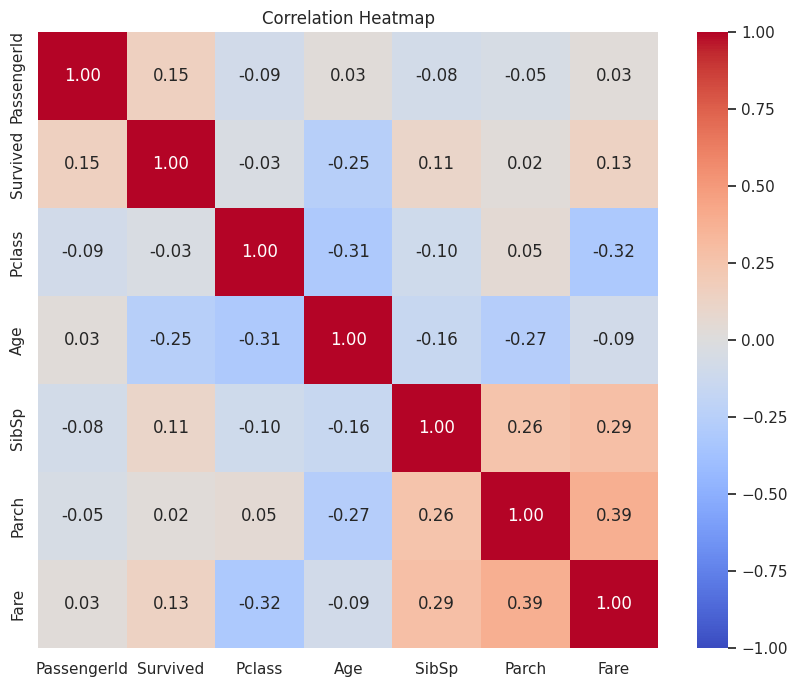

In [12]:
#correlation to understand relationships between features and the target variable ('Survived')
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# One-Hot Encoding for 'Sex' and 'Embarked'
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_cols = one_hot_encoder.fit_transform(df[['Sex', 'Embarked']])
column_names = one_hot_encoder.get_feature_names_out(['Sex', 'Embarked'])
encoded_df = pd.DataFrame(encoded_cols, columns=column_names)
print(encoded_df)


     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0           1.0       0.0         1.0         0.0         0.0
1           1.0       0.0         0.0         0.0         1.0
2           0.0       1.0         0.0         0.0         1.0
3           1.0       0.0         0.0         0.0         1.0
4           1.0       0.0         0.0         0.0         1.0
..          ...       ...         ...         ...         ...
178         1.0       0.0         0.0         0.0         1.0
179         0.0       1.0         0.0         0.0         1.0
180         1.0       0.0         1.0         0.0         0.0
181         1.0       0.0         0.0         0.0         1.0
182         0.0       1.0         1.0         0.0         0.0

[183 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
df['FamilySize'] = df['SibSp'] + df['Parch']
X = df[['Pclass', 'Age', 'Fare', 'FamilySize']]  # Adjust features as needed
y = df['Survived']

Splitting

In [33]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (146, 4)
Shape of X_test: (37, 4)
Shape of y_train: (146,)
Shape of y_test: (37,)


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model** **Selection**

In [35]:
#i will be using Logistic Regression, Random Forest and Gaussian Naive Bayes for this prediction and then compare the performance metrics
#since they all used in classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



In [36]:
# Instantiate the models
logreg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
nb = GaussianNB()
# Fit the models
models = {'Logistic Regression': logreg, 'Random Forest': rf, 'Gaussian Naive Bayes': nb}
for name, model in models.items():
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.7027027027027027
Random Forest Accuracy: 0.6756756756756757
Gaussian Naive Bayes Accuracy: 0.7027027027027027


**Model Evaluation**

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

model_accuracies = {}
# Evaluate Logistic Regression
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
model_accuracies['Logistic Regression'] = accuracy_logreg
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

# Evaluate Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
model_accuracies['Random Forest'] = accuracy_rf
print("Random Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Evaluate Gaussian Naive Bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
model_accuracies['Gaussian Naive Bayes'] = accuracy_nb
print("Gaussian Naive Bayes Evaluation:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.21      0.35        14
           1       0.68      1.00      0.81        23

    accuracy                           0.70        37
   macro avg       0.84      0.61      0.58        37
weighted avg       0.80      0.70      0.64        37

Confusion Matrix:
[[ 3 11]
 [ 0 23]]
Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        14
           1       0.69      0.87      0.77        23

    accuracy                           0.68        37
   macro avg       0.66      0.61      0.61        37
weighted avg       0.67      0.68      0.65        37

Confusion Matrix:
[[ 5  9]
 [ 3 20]]
Gaussian Naive Bayes Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.29      0.42        14
           1       0.69      0.96      0.80        23

    accuracy     

Model Comparison

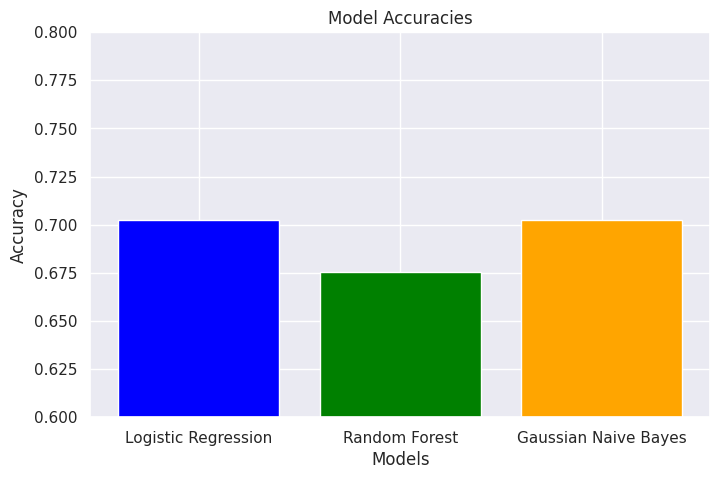

In [39]:
models = ['Logistic Regression', 'Random Forest', 'Gaussian Naive Bayes']
accuracies = [0.7027027027027027, 0.6756756756756757, 0.7027027027027027]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0.6, 0.8)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

In [42]:
# Compare Accuracies
best_model = max(model_accuracies, key=model_accuracies.get)
print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy}")
print(f"Best Model: {best_model}")

Model Accuracies:
Logistic Regression: 0.7027027027027027
Random Forest: 0.6756756756756757
Gaussian Naive Bayes: 0.7027027027027027
Best Model: Logistic Regression


**Training**

Accuracy of Gradient Boosting: 0.7297297297297297
Classification Report of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.76      0.83      0.79        23

    accuracy                           0.73        37
   macro avg       0.71      0.70      0.70        37
weighted avg       0.72      0.73      0.72        37

Confusion Matrix of Gradient Boosting:
[[ 8  6]
 [ 4 19]]


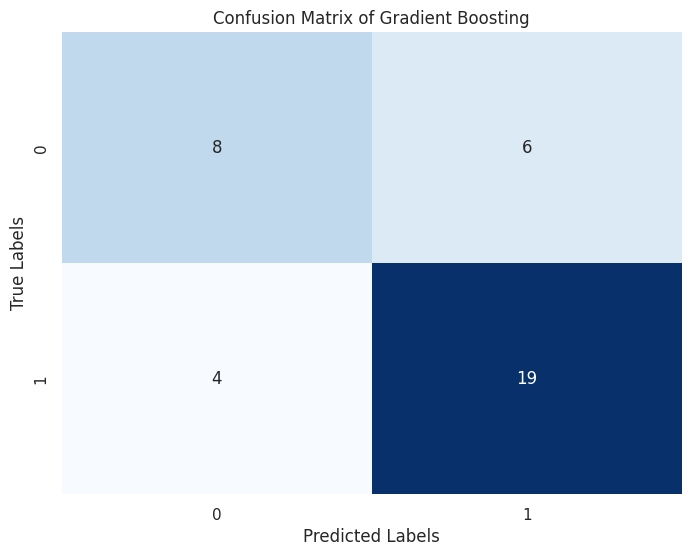

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting:", accuracy_gb)

# Display the classification report
print("Classification Report of Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Display the confusion matrix
print("Confusion Matrix of Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Gradient Boosting')
plt.show()


**Model Evaluation**

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import sensitivity_score

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Predict the labels for the test set using the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics for the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
sensitivity_gb = sensitivity_score(y_test, y_pred_gb)

# Print the evaluation metrics for the Gradient Boosting model
print("Evaluation metrics for Gradient Boosting:")
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1-score: {f1_gb:.2f}")
print(f"ROC-AUC: {roc_auc_gb:.2f}")
print(f"Sensitivity: {sensitivity_gb:.2f}")


Evaluation metrics for Gradient Boosting:
Accuracy: 0.73
Precision: 0.76
Recall: 0.83
F1-score: 0.79
ROC-AUC: 0.70
Sensitivity: 0.83


**Hyperparameter Tuning**

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the parameter grid for Gradient Boosting
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 5, 7]}

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a Gradient Boosting classifier with the best parameters
best_gb_model = GradientBoostingClassifier(**best_params)
best_gb_model.fit(X_train, y_train)

# Predictions on the test set using the tuned Gradient Boosting model
best_predictions = best_gb_model.predict(X_test)

# Calculate evaluation metrics for the tuned Gradient Boosting model
best_accuracy = accuracy_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions)
best_recall = recall_score(y_test, best_predictions)
best_f1 = f1_score(y_test, best_predictions)
best_roc_auc = roc_auc_score(y_test, best_predictions)

# Print evaluation metrics for the tuned Gradient Boosting model
print("Evaluation metrics for Gradient Boosting after hyperparameter tuning:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1-score: {best_f1}")
print(f"ROC-AUC: {best_roc_auc}")


Evaluation metrics for Gradient Boosting after hyperparameter tuning:
Accuracy: 0.7027027027027027
Precision: 0.7
Recall: 0.9130434782608695
F1-score: 0.7924528301886793
ROC-AUC: 0.6350931677018634


In [48]:
Final_model=best_gb_model
Final_model

GradientBoostingClassifier(learning_rate=0.01, n_estimators=150)

**Model Testing**

In [49]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Evaluation metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

best_gb_model = GradientBoostingClassifier(**best_params)

# Evaluating
evaluate_model(best_gb_model, X_train, y_train, X_test, y_test)


Evaluation metrics:
Accuracy: 0.7027027027027027
Precision: 0.7
Recall: 0.9130434782608695
F1-score: 0.7924528301886793


In [50]:
X_data = df[['Pclass', 'Age', 'Fare', 'FamilySize']]
predictions = best_gb_model.predict(X_data)

In [51]:
passenger_names = df['Name']
results_df = pd.DataFrame({'PassengerName': passenger_names, 'Survived': predictions})

In [52]:
results_df.to_csv("titanic_predictions.csv", index=False)
